In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt

Experiment class, object created by the raw experiment output files

In [2]:
class Experiment():
  def __init__(self,flags,mcts_configs,stats_keys,scores,progress,game_stats,player_stats,avg_score,avg_progress
               ,avg_time,errors,game_stats_full=None,player_stats_full=None):
    self.name = flags["agent"]+" vs "+flags["agents"]
    if flags["agent"] == 'MCTSAgent' or flags["agents"] == 'MCTSAgent':
      self.name += " mctstype:"+self.mcts_type_to_string(flags["mcts_types"][1])
    self.flags = flags
    self.mcts_configs = mcts_configs
    self.scores = scores
    self.progress = progress
    self.stats_keys = stats_keys
    self.game_stats = game_stats #lsit
    self.game_stats_full = game_stats_full
    self.player_stats = player_stats
    self.player_stats_full = player_stats_full
    self.avg_score = avg_score
    self.avg_time = avg_time
    self.errors = errors
    self.game_df = self.convert_to_df(game_stats)
    self.player_dfs = []
    for i in range(len(self.player_stats)):
      player_df = self.convert_to_df(player_stats[i])
      player_df["information_perc"] = player_df["information"]/(player_df["moves"].replace(0,1))
      player_df["discard_perc"] = player_df["discard"]/(player_df["moves"].replace(0,1))
      player_df["play_perc"] = player_df["play"]/(player_df["moves"].replace(0,1))
      self.player_dfs.append(player_df)

  def update_name(self,prefix="", suffix=""):
    self.name = prefix+self.name+suffix
      
  def convert_to_df(self, stat_list):
    stat_df = pd.DataFrame({stat_string:[s[self.stat_index(stat_string)] for s in stat_list] for stat_string in self.stats_keys})
    return stat_df

  def stat(self,stat_string):
    return self.game_df[stat_string]
  
  def player_stat(self,stat_string,player=0):
    return self.player_dfs[player][stat_string]
  
  def nonzero(self,stat_string):
    return (self.game_df[stat_string] != 0).sum() / len(self.game_df)
  
  def avg(self,stat_string):
    return sum(self.game_df[stat_string])/len(self.game_df)
  
  def player_individual_avg(self,stat_string, player=0):
    """Take a player's df. Compute average"""
    return sum(self.player_dfs[player][stat_string])/len(self.player_dfs[player])
  
  def players_avg(self, stat_string,players=[0,1,2]):
    stat_sum = 0
    for player in players:
      stat_sum += self.player_individual_avg(stat_string, player)
    return stat_sum/len(players)
      
  def players_perc_nonzero(self,stat_string,players=[0]):
    stat_sum = 0
    for player in players:
      stat_sum += (self.player_dfs[player][stat_string] != 0).sum() / len(self.player_dfs[player])
    return stat_sum/len(players)
  
  def compute_avg_stat_raw(self,stat_string):
    total_score = sum([game[self.stat_index(stat)] for game in self.game_stats])
    return total_score/len(self.game_stats)
  
  def stat_index(self,stat_string):
    return self.stats_keys.index(stat_string)

  def mcts_type_to_string(self,mcts_type):
    if mcts_type == '0': #default
      return 'default'
    elif mcts_type == '1': #regret
      return 'regret'
    elif mcts_type == '2': #c_regret
      return 'c_regret'
    elif mcts_type == '3': #detnone
      return 'detnone'
    elif mcts_type == '4': #detnone_rulesnone
      return 'detnone_rulesnone'
    elif mcts_type == '5': #detnone_random_rulesnone
      return 'detnone_random_rulesnone'
    elif mcts_type == '6': #detnone_regret_depth1
      return 'detnone_regret_depth1'
    elif mcts_type == '7': #c
      return 'c'
    elif mcts_type == '8': #rulesnone
      return 'rulesnone'
    elif mcts_type == '9': #detnone_regret
      return 'detnone_regret'
    elif mcts_type == 'a': #regret_rulesnone
      return 'regret_rulesnone'
    elif mcts_type == 'b': #detnone_regret_rulesnone
      return 'detnone_regret_rulesnone'
    elif mcts_type == 'c': #detnone_c
      return 'detnone_c'
    elif mcts_type == 'd': #mix_default
      return 'mix_default'
    elif mcts_type == 'e':  # mix_flawed
      return 'mix_flawed'
    elif mcts_type == 'f':  # mix_flawed_regret
      return 'mix_flawed_regret'
    elif mcts_type == 'g':  # mix_flawed_depth1
      return 'mix_flawed_depth1'
    elif mcts_type == 'h':  # mix_flawed_regret_depth1
      return 'mix_flawed_regret_depth1'
    elif mcts_type == 'i':  # mix_mute
      return 'mix_mute'
    elif mcts_type == 'j':  # mix_mute_regret
      return 'mix_mute_regret'
    elif mcts_type == 'k':  # mix_mute_depth1
      return 'mix_mute_depth1'
    elif mcts_type == 'l':  # mix_mute_regret_depth1
      return 'mix_mute_regret_depth1'
    elif mcts_type == 'm':  # mix_inner
      return 'mix_inner'
    elif mcts_type == 'n':  # mix_inner_regret
      return 'mix_inner_regret'
    elif mcts_type == 'o':  # mix_inner_depth1
      return 'mix_inner_depth1'
    elif mcts_type == 'p':  # mix_inner_regret_depth1
      return 'mix_inner_regret_depth1'
    elif mcts_type == 'q':  # mix_random
      return 'mix_random'
    elif mcts_type == 'r':  # mix_random_regret
      return 'mix_random_regret'
    elif mcts_type == 's':  # mix_random_depth1
      return 'mix_random_depth1'
    elif mcts_type == 't':  # mix_random_regret_depth1
      return 'mix_random_regret_depth1'
    elif mcts_type == 'u':  # mix_vdb
      return 'mix_vdb'
    elif mcts_type == 'v':  # mix_vdb_regret
      return 'mix_vdb_regret'
    elif mcts_type == 'w':  # mix_vdb_depth1
      return 'mix_vdb_depth1'
    elif mcts_type == 'x':  # mix_vdb_regret_depth1
      return 'mix_vdb_regret_depth1'
    else:
      return 'error'
    
  
  def __str__(self):
    return str(self.flags)

  def __repr__(self):
    return str(self.flags)

Define notebook functions

In [101]:
def explain_experiment(exp):
    print(exp.name)
    print(exp)
    print(exp.mcts_configs)
    print(f"Available stats: {exp.stats_keys}")
    print(f"Scores: {exp.scores}")
    print(f"Progress: {exp.progress}")
    print(f"Printed average game score {exp.avg_score}")
    print(f"Computed average game score {exp.avg('score')}")
    print(f"Computed average game progress {exp.avg('progress')}")
    print(f"Computed average game regret {exp.avg('regret')}")

def row_experiment(exp,players=[0]):
  """Squish experiment into one row"""
  exp_dict = {}
  exp_dict["name"] = exp.name
  exp_dict["avg_score"] = exp.avg("score")
  exp_dict["avg_progress"] = exp.avg("progress")
  exp_dict["avg_regret"] = exp.avg("regret")
  exp_dict["regret"] = exp.players_avg("regret",players)
  exp_dict["regret_indiv0"] = exp.players_avg("regret",[0])
  exp_dict["regret_indiv1"] = exp.players_avg("regret",[1])
  exp_dict["regret_indiv2"] = exp.players_avg("regret",[2])
  exp_dict["regret_perc"] = exp.players_perc_nonzero("regret",players)
  exp_dict["regret_discard"] = exp.players_avg("regret_discard_critical",players)
  exp_dict["regret_discard_perc"]= exp.players_perc_nonzero("regret_discard_critical",players)
  exp_dict["regret_play"] = exp.players_avg("regret_play_fail",players)
  exp_dict["regret_play_perc"]= exp.players_perc_nonzero("regret_play_fail",players)
  exp_dict["regret_endgame"] = exp.players_avg("regret_play_fail_endgame",players)
  exp_dict["regret_endgame_perc"]= exp.players_perc_nonzero("regret_play_fail_endgame",players)
  exp_dict["info"] = exp.players_avg("information",players)
  exp_dict["info_perc"] = exp.players_avg("information_perc",players)
  exp_dict["discard"] = exp.players_avg("discard",players) 
  exp_dict["discard_perc"]=   exp.players_avg("discard_perc",players)
  exp_dict["play"] = exp.players_avg("play",players)
  exp_dict["play_perc"] = exp.players_avg("play_perc",players)
  exp_df = pd.DataFrame(exp_dict, index = [0])
  return exp_df

def experiments_dict_to_df(experiment_dict,players=[0,1,2], decimals=2):
  df = pd.concat([row_experiment(exp,players) for k,exp in experiment_dict.items()]).round(decimals)
  # Post-experiment hack to redefine this stat
  df["regret_play"] = df["regret"] - df["regret_discard"] - df["regret_endgame"]
  return df

def mixed_experiments_dict_to_df(experiment_dict,second_players=[1,2],decimals=2):
  experiment_df = experiments_dict_to_df(experiment_dict,[0],decimals)
  experiment_df = condense_experiments_df(experiment_df, True)
  # Pull same df for 2p agents
  experiment_df_2p = experiments_dict_to_df(experiment_dict,second_players,decimals)
  experiment_df_2p = condense_experiments_df(experiment_df_2p,True)
  # Cut off the Team stats from 2p (but keep name)
  keep_cols = list(experiment_df_2p.columns)[:1] +list(experiment_df_2p.columns)[4:]
  experiment_df_2p = experiment_df_2p[keep_cols]
  df = pd.merge(experiment_df,experiment_df_2p, on="name", how="left", suffixes=("","_2")).round(decimals)
  df.drop(columns = ["regret","regret_indiv0_2","regret_indiv1_2","regret_indiv2_2"], inplace=True)
  return df

def self_experiments_dict_to_df(experiment_dict,players=[0,1,2],decimals=2):
  experiment_df = experiments_dict_to_df(experiment_dict,players,decimals)
  return condense_experiments_df(experiment_df,mixed=False)

def condense_experiments_df(experiment_df,mixed=False):
  """Remove superfluous columns"""
  drop_cols = set(["info","discard","play","info_perc","discard_perc","play_perc","regret_discard_perc","regret_endgame_perc","regret_perc","regret_play_perc","info_perc","discard_perc","play_perc"])
  if mixed:
    drop_cols.update(set(["info_perc","discard_perc","play_perc","regret_discard_perc","regret_perc","regret_play_perc","regret_endgame_perc",
                         "regret_discard","regret_play","regret_endgame","regret_discard_2","regret_play_2","regret_endgame_2"]))
  drop_cols = [c for c in drop_cols if c in experiment_df.columns]
  return experiment_df.drop(columns=drop_cols, inplace=False)

def plot_hist(series,xlabel="x",ylabel="y",title="",xlim=None,ylim=None,bins=None):
  """Series is a dict {name:data}"""
  fig, ax = plt.subplots()
  for name,s in series.items():
    if bins is None:
      bins = np.arange(0, s.max() + 1.5) - 0.5
    ax.hist(s,bins,alpha=0.5, label=name)
  plt.legend(loc='upper left')
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  if xlim:
    ax.set_xlim(xlim)
  if ylim:
    ax.set_ylim(ylim)

  plt.show()
  
def plot_scatter(xseries,yseries,xlabel="x",ylabel="y",title="",xlim=None,ylim=None,legend=True,legend_loc='upper left'):
  """Series is a dict {name:data}"""
  fig, ax = plt.subplots()
  ax.scatter(xseries,yseries)
  if legend:
    plt.legend(loc=legend_loc)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  if xlim:
    ax.set_xlim(xlim)
  if ylim:
    ax.set_ylim(ylim)
  plt.show()

  
def plot_boxplot(my_dict,xlabel="x",ylabel="y",title="",xlim=None,ylim=None,legend=True,legend_loc='upper left'):
  """Series is a dict {name:data}"""
  fig, ax = plt.subplots()
  ax.boxplot(my_dict.values())
  ax.set_xticklabels(my_dict.keys())
  if legend:
    plt.legend(loc=legend_loc)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  if xlim:
    ax.set_xlim(xlim)
  if ylim:
    ax.set_ylim(ylim)
    
  plt.show()

Read in data`

In [4]:
# Each file is a list of experiments
file_names = ["self_rule/vrun_rulebased.sh.o"
,"mix_rule/mix_rulebased.txt"
,"self_search/vrun_mcts_detnone_c.sh.o1216718"
,"self_search/vrun_mcts_c.sh.o1216265"
,"self_search/vrun_mcts_c_regret.sh.o1215729"
,"self_search/vrun_mcts_detnone.sh.o1215731"
,"self_search/vrun_mcts_detnone_regret.sh.o1216716"
,"self_search/vrun_mcts_default.sh.o1215727"
,"self_search/vrun_mcts_regret.sh.o1215737"
,"self_search/vrun_mcts_detnone_rulesnone.sh.o1215732"
,"self_search/vrun_mcts_rulesnone.sh.o1215954"
,"self_search/vrun_mcts_detnone_regret_rulesnone.sh.o1216717"
,"self_search/vrun_mcts_regret_rulesnone.sh.o1215958"
,"self_search/vrun_mcts_detnone_random_rulesnone.sh.o1215733"              
,"mix_search/mixflawed_regret.sh.o1216720"
,"mix_search/mixflawed.sh.o1216719"
,"mix_search/mixinner_regret.sh.o1216721"
,"mix_search/mixinner.sh.o1216722"
,"mix_search/mixmute_regret.sh.o1216724"
,"mix_search/mixmute.sh.o1216723"
,"mix_search/mixrandom_regret.sh.o1216726"
,"mix_search/mixrandom.sh.o1216725"
,"mix_search/mixflawed_regret.sh.o1216720"
,"mix_search/mixvdb_regret.sh.o1217253"
,"mix_search/mixvdb.sh.o1217255"
,"mix_search_re/mixflawed_regret.sh.o1216268"
,"mix_search_re/mixflawed.sh.o1216267"
,"mix_search_re/mixinner_regret.sh.o1216272"
,"mix_search_re/mixinner.sh.o1216270"
,"mix_search_re/mixmute_regret.sh.o1216273"
,"mix_search_re/mixmute.sh.o1216274"
,"mix_search_re/mixrandom_regret.sh.o1216277"
,"mix_search_re/mixrandom.sh.o1216275"
              
]
master_experiments = {}

for v in file_names:
  experiments_store = None
  experiments = None
  folder_name = v.split('/')[0]
  script_name = v.split('/')[1].split('.')[0]
  exec(open(v).read()) # Defines a list of experiments (eg. 2p - 5p)
  assert experiments_store is not None or experiments is not None
  if experiments_store is not None: # Handle legeacy case where it was set to experiments_store
    experiments = experiments_store
  for i in range(len(experiments)):
    experiments[i].update_name(suffix = " folder:" + folder_name + " script:"+ script_name + "_"+str(i))
    master_experiments[experiments[i].name] = experiments[i]

experiment_list = [v for k,v in master_experiments.items()]
experiment_dict = {k:exp for k,exp in master_experiments.items()}

for exp in experiment_list:
  explain_experiment(exp)

MuteAgent vs MuteAgent folder:self_rule script:vrun_rulebased_0
{'players': 3, 'num_episodes': 250, 'agent': 'MuteAgent', 'agents': 'MuteAgent', 'mcts_types': '000', 'agent_classes': ['MuteAgent', 'MuteAgent', 'MuteAgent']}
[]
Available stats: ['score', 'progress', 'moves', 'regret', 'regret_discard_critical', 'regret_play_fail', 'regret_play_fail_critical', 'regret_play_fail_endgame', 'discard', 'discard_critical', 'discard_useful', 'discard_safe', 'play', 'play_success', 'play_fail', 'play_fail_critical', 'play_fail_endgame', 'information', 'information_color', 'information_rank', 'elapsed_time']
Scores: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

FlawedAgent vs MCTSAgent mctstype:mix_flawed_regret folder:mix_search_re script:mixflawed_regret_0
{'players': 3, 'num_episodes': 100, 'agent': 'FlawedAgent', 'agents': 'MCTSAgent', 'mcts_types': 'fff', 'agent_classes': ['FlawedAgent', 'MCTSAgent', 'MCTSAgent']}
[{'max_time_limit': 10000, 'max_rollout_num': 100, 'agents': '[<agents.rule_based.rule_based_agents.FlawedAgent object at 0x2b6cd8bac898>, <agents.rule_based.rule_based_agents.VanDenBerghAgent object at 0x2b6cd8bac240>, <agents.rule_based.rule_based_agents.VanDenBerghAgent object at 0x2b6cd8bac780>]', 'max_simulation_steps': 3, 'max_depth': 100, 'determine_type': 0, 'score_type': 1, 'exploration_weight': 2.5, 'playable_now_convention': False, 'playable_now_convention_sim': False, 'rules': '[<function Ruleset.tell_most_information_factory.<locals>.tell_most_information at 0x2b6ce1893d90>, <function Ruleset.tell_anyone_useful_card at 0x2b6ce1875598>, <function Ruleset.tell_dispensable_factory.<locals>.tell_dispensable at 0x2b6cd8

In [5]:
explain_experiment(experiment_dict["MCTSAgent vs MCTSAgent detnone_regret_rulesnone folder:self_search script:vrun_mcts_regret_rulesnone"])

KeyError: 'MCTSAgent vs MCTSAgent detnone_regret_rulesnone folder:self_search script:vrun_mcts_regret_rulesnone'

Analyse as self play stats (1 lot of detailed player stats averaged across [0,1,2])

# Self Play

In [6]:
self_df = self_experiments_dict_to_df(master_experiments)
self_df.sort_values(by="avg_score",inplace = True)

### Self Play: Rule Based

In [7]:
self_df[self_df["name"].str.contains("folder:self_rule")]

,name,avg_score,avg_progress,avg_regret,regret,regret_indiv0,regret_indiv1,regret_indiv2,regret_discard,regret_play,regret_endgame
0,MuteAgent vs MuteAgent folder:self_rule script:vrun_rulebased_0,0.00,1.26,25.00,8.33,8.14,8.36,8.51,0.00,0.13,8.20
0,LegalRandomAgent vs LegalRandomAgent folder:self_rule script:vrun_rulebased_1,0.00,1.36,25.00,8.33,8.80,8.31,7.90,0.28,0.15,7.90
0,FlawedAgent vs FlawedAgent folder:self_rule script:vrun_rulebased_2,0.00,1.46,25.00,8.33,9.15,8.54,7.31,0.00,0.15,8.18
0,InnerAgent vs InnerAgent folder:self_rule script:vrun_rulebased_3,10.68,10.68,10.02,3.34,3.21,3.60,3.22,3.34,0.00,0.00
0,OuterAgent vs OuterAgent folder:self_rule script:vrun_rulebased_4,15.35,15.35,6.24,2.08,2.04,2.08,2.12,2.08,0.00,0.00
0,IGGIAgent vs IGGIAgent folder:self_rule script:vrun_rulebased_5,15.90,15.90,6.36,2.12,2.09,2.20,2.07,2.12,0.00,0.00
0,PiersAgent vs PiersAgent folder:self_rule script:vrun_rulebased_6,16.93,16.93,5.77,1.92,1.84,2.08,1.85,1.77,0.15,0.00
0,VanDenBerghAgent vs VanDenBerghAgent folder:self_rule script:vrun_rulebased_7,17.12,17.12,3.95,1.32,1.19,1.31,1.46,1.24,0.08,0.00


### Self Play: Search Based

In [13]:
self_df[self_df["name"].str.contains("folder:self_search")]

,name,avg_score,avg_progress,avg_regret,regret,regret_indiv0,regret_indiv1,regret_indiv2,regret_discard,regret_play,regret_endgame
0,MCTSAgent vs MCTSAgent mctstype:detnone_random_rulesnone folder:self_search script:vrun_mcts_detnone_random_rulesnone_0,2.13,3.00,21.74,7.25,5.92,8.79,7.03,1.75,0.10,5.40
0,MCTSAgent vs MCTSAgent mctstype:detnone_regret_rulesnone folder:self_search script:vrun_mcts_detnone_regret_rulesnone_0,5.39,5.74,13.27,4.42,4.90,4.29,4.08,3.88,0.14,0.40
0,MCTSAgent vs MCTSAgent mctstype:rulesnone folder:self_search script:vrun_mcts_rulesnone_0,6.57,6.96,14.91,4.97,4.26,5.15,5.50,3.50,0.11,1.36
0,MCTSAgent vs MCTSAgent mctstype:detnone_regret_rulesnone folder:self_search script:vrun_mcts_regret_rulesnone_0,7.07,7.36,12.24,4.08,3.22,4.91,4.11,3.45,0.13,0.50
0,MCTSAgent vs MCTSAgent mctstype:detnone_rulesnone folder:self_search script:vrun_mcts_detnone_rulesnone_0,7.19,7.68,14.63,4.88,5.52,4.52,4.59,3.47,0.23,1.18
0,MCTSAgent vs MCTSAgent mctstype:regret folder:self_search script:vrun_mcts_regret_0,18.29,18.29,3.08,1.03,0.80,0.97,1.31,0.95,0.08,0.00
0,MCTSAgent vs MCTSAgent mctstype:default folder:self_search script:vrun_mcts_default_0,18.70,18.73,3.37,1.12,0.89,1.46,1.02,0.98,0.06,0.08
0,MCTSAgent vs MCTSAgent mctstype:c_regret folder:self_search script:vrun_mcts_c_regret_0,18.74,18.85,2.82,0.94,1.04,0.95,0.83,0.83,0.04,0.07
0,MCTSAgent vs MCTSAgent mctstype:detnone_regret folder:self_search script:vrun_mcts_detnone_regret_0,18.97,18.97,1.82,0.61,0.56,0.57,0.69,0.59,0.02,0.00
0,MCTSAgent vs MCTSAgent mctstype:detnone folder:self_search script:vrun_mcts_detnone_0,19.15,19.15,3.44,1.15,1.23,0.99,1.22,1.12,0.03,0.00


# Mixed Play

Analyse as mixed stats(2 lots of fewer players stats averaged across [0],[1,2] resectively)

### Mixed Play: Rule Based

In [29]:
mixed_df = mixed_experiments_dict_to_df(master_experiments)
mixed_df.sort_values(by="avg_score",inplace = True)

In [11]:
mixed_df[mixed_df["name"].str.contains("folder:mix_rule")]

,name,avg_score,avg_progress,avg_regret,regret_indiv0,regret_indiv1,regret_indiv2,regret_2
19,FlawedAgent vs VanDenBerghAgent folder:mix_rule script:mix_rulebased_11,0.14,5.67,24.84,24.50,0.22,0.12,0.17
18,FlawedAgent vs PiersAgent folder:mix_rule script:mix_rulebased_10,0.21,5.67,24.77,24.25,0.30,0.22,0.26
14,LegalRandomAgent vs PiersAgent folder:mix_rule script:mix_rulebased_6,0.47,6.54,24.38,22.03,1.27,1.09,1.18
17,FlawedAgent vs IGGIAgent folder:mix_rule script:mix_rulebased_9,0.51,6.05,24.42,23.85,0.32,0.24,0.28
16,FlawedAgent vs OuterAgent folder:mix_rule script:mix_rulebased_8,0.54,6.16,24.35,23.86,0.27,0.22,0.25
12,LegalRandomAgent vs OuterAgent folder:mix_rule script:mix_rulebased_4,0.72,5.76,23.94,22.12,1.04,0.78,0.91
15,LegalRandomAgent vs VanDenBerghAgent folder:mix_rule script:mix_rulebased_7,0.76,6.12,23.85,22.37,0.85,0.63,0.74
13,LegalRandomAgent vs IGGIAgent folder:mix_rule script:mix_rulebased_5,0.93,6.50,23.72,21.10,1.43,1.19,1.31
20,InnerAgent vs OuterAgent folder:mix_rule script:mix_rulebased_12,14.15,14.15,6.92,2.54,2.42,1.96,2.19
21,InnerAgent vs IGGIAgent folder:mix_rule script:mix_rulebased_13,14.47,14.47,7.32,2.70,2.44,2.19,2.31


In [12]:
mixed_df[(mixed_df["name"].str.contains("folder:mix_search s")) \
         & ~(mixed_df["name"].str.contains("depth1"))]

,name,avg_score,avg_progress,avg_regret,regret_indiv0,regret_indiv1,regret_indiv2,regret_2
42,FlawedAgent vs MCTSAgent mctstype:mix_default folder:mix_search script:mixflawed_0,0.56,6.39,24.38,23.26,0.57,0.55,0.56
57,LegalRandomAgent vs MCTSAgent mctstype:mix_default folder:mix_search script:mixrandom_0,0.98,6.35,23.71,21.73,1.03,0.95,0.99
55,LegalRandomAgent vs MCTSAgent mctstype:mix_random_regret folder:mix_search script:mixrandom_regret_0,1.30,5.81,23.12,20.58,1.47,1.07,1.27
58,LegalRandomAgent vs MCTSAgent mctstype:mix_random folder:mix_search script:mixrandom_1,1.87,6.76,22.32,20.01,1.22,1.09,1.16
40,FlawedAgent vs MCTSAgent mctstype:mix_flawed_regret folder:mix_search script:mixflawed_regret_0,2.29,7.95,22.14,20.55,0.60,0.99,0.80
43,FlawedAgent vs MCTSAgent mctstype:mix_flawed folder:mix_search script:mixflawed_1,2.43,7.67,22.03,20.55,0.77,0.71,0.74
45,InnerAgent vs MCTSAgent mctstype:mix_inner_regret folder:mix_search script:mixinner_regret_0,15.96,15.96,4.20,2.09,1.34,0.77,1.06
47,InnerAgent vs MCTSAgent mctstype:mix_default folder:mix_search script:mixinner_0,16.13,16.13,5.29,2.22,1.50,1.57,1.54
48,InnerAgent vs MCTSAgent mctstype:mix_inner folder:mix_search script:mixinner_1,16.46,16.46,5.64,2.62,1.47,1.55,1.51
50,MuteAgent vs MCTSAgent mctstype:mix_mute_regret folder:mix_search script:mixmute_regret_0,17.50,17.50,2.74,2.04,0.37,0.33,0.35


# Discussion

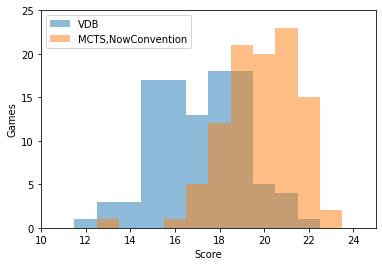

In [27]:
name = ["VanDenBerghAgent vs VanDenBerghAgent folder:self_rule script:vrun_rulebased_7"
        ,"MCTSAgent vs MCTSAgent mctstype:detnone_c folder:self_search script:vrun_mcts_detnone_c_0"]
series = {"VDB":experiment_dict[name[0]].game_df["score"][0:100]
         ,"MCTS,NowConvention":experiment_dict[name[1]].game_df["score"][0:100]}
plot_hist(series,xlabel="Score",ylabel="Games", title="", xlim=(10,25),ylim=(0,25)
         , bins=np.arange(0, 25 + 1.5) - 0.5)

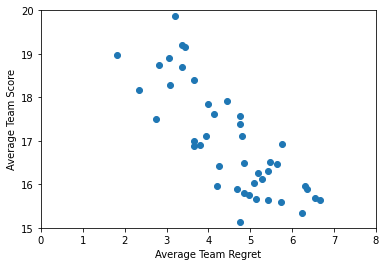

In [57]:
plot_scatter(mixed_df["avg_regret"],mixed_df["avg_score"]
             ,xlabel='Average Team Regret', ylabel = 'Team Regret (avg)'
             , xlim=(0,8),ylim=(15,20),legend=False)

In [ ]:
matplotlib.pyplot.boxplot

my_dict = {'ABC': [34.54, 34.345, 34.761], 'DEF': [34.541, 34.748, 34.482]}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

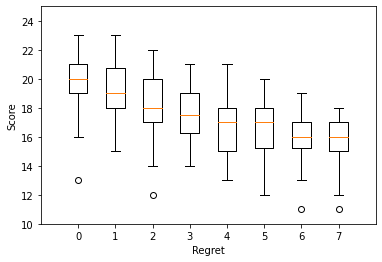

In [204]:
import random
game_dfs = [g.game_df for g in experiment_dict.values()]
regret_scores_dict = {r:[] for r in range(8)}

for game_df in game_dfs:
  for r in range(8):
    regret_scores_dict[r] += list(game_df[game_df["regret"] == r]["score"])
    
for r in range(8):
  random.shuffle(regret_scores_dict[r])
  regret_scores_dict[r] = regret_scores_dict[r][:50]

plot_boxplot(regret_scores_dict,xlabel="Regret",ylabel="Score", title=""
             ,legend=False, xlim=(0,9),ylim=(10,25))

In [148]:
sum(experiment_dict["OuterAgent vs OuterAgent"].game_df["score"] == 13)

KeyError: 'OuterAgent vs OuterAgent'

In [ ]:
 def mcts_type_to_string(self,mcts_type):
    if mcts_type == '0': #default
      return 'default'
    elif mcts_type == '1': #regret
      return 'regret'
    elif mcts_type == '2': #c_regret
      return 'c_regret'
    elif mcts_type == '3': #detnone
      return 'detnone'
    elif mcts_type == '4': #detnone_rulesnone
      return 'detnone_rulesnone'
    elif mcts_type == '5': #detnone_random_rulesnone
      return 'detnone_random_rulesnone'
    elif mcts_type == '6': #detnone_regret_depth1
      return 'detnone_regret_depth1'
    elif mcts_type == '7': #c
      return 'c'
    elif mcts_type == '8': #rulesnone
      return 'rulesnone'
    elif mcts_type == '9': #detnone_regret
      return 'detnone_regret'
    elif mcts_type == 'a': #regret_rulesnone
      return 'regret_rulesnone'
    elif mcts_type == 'b': #detnone_regret_rulesnone
      return 'detnone_regret_rulesnone'
    elif mcts_type == 'c': #detnone_c
      return 'detnone_c'
    elif mcts_type == 'd': #mix_default
      return 'mix_default'
    elif mcts_type == 'e':  # mix_flawed
      return 'mix_flawed'
    elif mcts_type == 'f':  # mix_flawed_regret
      return 'mix_flawed_regret'
    elif mcts_type == 'g':  # mix_flawed_depth1
      return 'mix_flawed_depth1'
    elif mcts_type == 'h':  # mix_flawed_regret_depth1
      return 'mix_flawed_regret_depth1'
    elif mcts_type == 'i':  # mix_mute
      return 'mix_mute'
    elif mcts_type == 'j':  # mix_mute_regret
      return 'mix_mute_regret'
    elif mcts_type == 'k':  # mix_mute_depth1
      return 'mix_mute_depth1'
    elif mcts_type == 'l':  # mix_mute_regret_depth1
      return 'mix_mute_regret_depth1'
    elif mcts_type == 'm':  # mix_inner
      return 'mix_inner'
    elif mcts_type == 'n':  # mix_inner_regret
      return 'mix_inner_regret'
    elif mcts_type == 'o':  # mix_inner_depth1
      return 'mix_inner_depth1'
    elif mcts_type == 'p':  # mix_inner_regret_depth1
      return 'mix_inner_regret_depth1'
    elif mcts_type == 'q':  # mix_random
      return 'mix_random'
    elif mcts_type == 'r':  # mix_random_regret
      return 'mix_random_regret'
    elif mcts_type == 's':  # mix_random_depth1
      return 'mix_random_depth1'
    elif mcts_type == 't':  # mix_random_regret_depth1
      return 'mix_random_regret_depth1'
    elif mcts_type == 'u':  # mix_vdb
      return 'mix_vdb'
    elif mcts_type == 'v':  # mix_vdb_regret
      return 'mix_vdb_regret'
    elif mcts_type == 'w':  # mix_vdb_depth1
      return 'mix_vdb_depth1'
    elif mcts_type == 'x':  # mix_vdb_regret_depth1
      return 'mix_vdb_regret_depth1'
    else:
      return 'error'